# Linear Regression with Tensorflow 2.0
## Data 전처리

In [23]:
# https://towardsdatascience.com/get-started-with-tensorflow-2-0-and-linear-regression-29b5dbd65977의 자료를 따라하며 정리한 것임.

#Linear Regression 
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 임의로 데이터 생성 shape:(10, 2).. 임의 데이터
input_data = [[0, 10],
             [1, 12],
             [2, 14],
             [3, 15],
             [4, 15],
             [5, 16],
             [6, 18],
             [7, 20],
             [8, 21],
             [9, 25]]

pd_data = pd.DataFrame(input_data, columns=['Days', 'Intake'])
#print(pd_data)

train_X, test_X, train_Y, test_Y = train_test_split(pd_data['Days'],
                                                    pd_data['Intake'],
                                                    test_size = 0.3)
# training에 사용할 data
X = tf.constant(train_X, dtype=tf.float32)
Y = tf.constant(train_Y, dtype=tf.float32)

# test에 사용할 data
t_X = tf.constant(test_X, dtype=tf.float32)
t_Y = tf.constant(test_Y, dtype=tf.float32)

print(X)

tf.Tensor([8. 5. 1. 2. 6. 7. 9.], shape=(7,), dtype=float32)


# Hypothesis , MSE, MSE' 정의

In [19]:
def mean_squared_error (Y, y_pred):  # 그래프에 출력할때 사용. 학습시에는 MSE`(MSE_deriv)을 사용함.
    return tf.reduce_mean(tf.square(y_pred - Y)) 

def mean_squared_error_deriv (Y, y_pred): # 학습에 사용되는 함수
    return tf.reshape(tf.reduce_mean(2*(y_pred- Y)), [1,1])  # 2*(y_pred-Y) : (y_pred - Y)^2의 미분형태
#tf.reshape는 해당 텐서를 옵션으로준 shape 모양으로 바꾸어줌.

def h (X, weights, bias):
    return tf.tensordot(X, weights, axes=1) + bias # tensordot : dot product? : matmul과 동일?

# Training Parameter 지정 및 학습

Loss is 316.91180419921875
Loss is 282.10394287109375
Loss is 251.9393768310547
Loss is 225.83712768554688
Loss is 203.28683471679688
Loss is 183.8402557373047
Loss is 167.10394287109375
Loss is 152.7324676513672
Loss is 140.4228057861328
Loss is 129.90916442871094
Loss is 120.95854949951172
Loss is 113.36664581298828
Loss is 106.95462036132812
Loss is 101.5657958984375
Loss is 97.06306457519531
Loss is 93.32659912109375
Loss is 90.25153350830078
Loss is 87.74629974365234
Loss is 85.73101043701172
Loss is 84.13593292236328


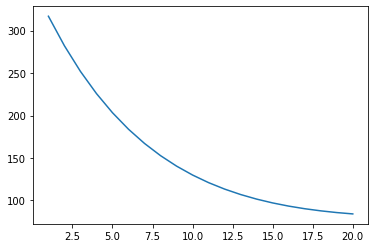

In [35]:
num_epochs = 20
num_samples = X.shape[0]  # 훈련 dataset의 데이터 개수를 뜻함 : 위에서 70퍼센트로 지정했으므로 7개임
batch_size = 7 # 훈련데이터셋에서 한번에 얼마나 학습할지(batch) size 지정
# 굳이 전체 데이터를 batch로 나누어서 학습하는 이유? 
# 메모리 용량의 한계때문에, 모든 훈련셋을 메모리에 다 불러올 수 없는 경우가 많기 때문임.

learning_rate = 0.001

# tf.data.Dataset 객체는 데이터와 batch를 효율적으로 저장한다.
dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
# from_tensor_slices : Creates a Dataset whose elements are slices of the given tensors
# X와 Y의 slice(일부)를 반환한다는 것 같음.
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size ) # shuffle?
iterator = dataset.__iter__() # iterator, dataset에서 batch를 가리키는 반복자



num_features = 1 # 속성의 수가 2이상인 경우 X.shape[1]로 해야 맞지만, 내가 만든데이터처럼 1개일때는 1로 인식이 안되므로.. 1로 직접 넣어주었음..
weights = tf.random.normal((num_features, 1)) # 가설의 W
bias = 0 # 가설의 b

# 그래프 출력용..
epochs_plot = list() # 그래프 x축
loss_plot = list() #그래프 y축

for i in range(num_epochs) : # training set을 총 반복할 횟수 : num_epochs
    epoch_loss = list()
    for b in range(int(num_samples/batch_size)): # training set(num_samples개)을 batch size만큼 나누어서 학습하므로..
        x_batch, y_batch = iterator.get_next()
        x_batch = tf.reshape(x_batch, shape=(7,1)) # 1차원 행렬(즉, (1,7))로 인식해서 계산이 안되므로, shape를 (7,1)로 변경 필수
        
        output = h(x_batch, weights, bias)
        #print(output) # output은 batch에 대한 예측값이 저장됨.
        loss = epoch_loss.append(mean_squared_error(y_batch, output).numpy())
        
        dJ_dH = mean_squared_error_deriv( y_batch , output) # y_batch(정답)과 예측값(output)으로 MSE`(prime)을 구한다
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW ) # round Loss/ round W = (round Loss / round h) * (round h / round W)
        dJ_dB = tf.reduce_mean( dJ_dH )
        
        
        # W와 b를 update
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

plt.plot( epochs_plot , loss_plot ) 
plt.show()

# Test Data에 적용해보기

In [70]:
t_X = tf.reshape(t_X, [t_X.shape[0],1]) # (3,1)로 변경
test_out = h(t_X, weights, bias)
print(test_out)
label = t_Y
print(label)

print("\nRegression Equation : Y = X", weights.numpy()[0,0], " + ", bias.numpy()) # tensor를 numpy로 변환!

tf.Tensor(
[[7.407727  ]
 [9.741382  ]
 [0.40676144]], shape=(3, 1), dtype=float32)
tf.Tensor([15. 15. 10.], shape=(3,), dtype=float32)

Regression Equation : Y = X 2.333655  +  0.40676144


# 참고
 tf.GradientTape()는 미분 값을 구해주는 메소드임. 다른 Cost function의 학습을 위해서 공부 필요